<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921 entries, 0 to 2920
Columns: 143 entries, Rk to AerWon%
dtypes: float64(133), int64(5), object(5)
memory usage: 3.2+ MB
Rk         0
Player     0
Nation     1
Pos        0
Squad      0
          ..
OG         0
Recov      0
AerWon     0
AerLost    0
AerWon%    0
Length: 143, dtype: int64


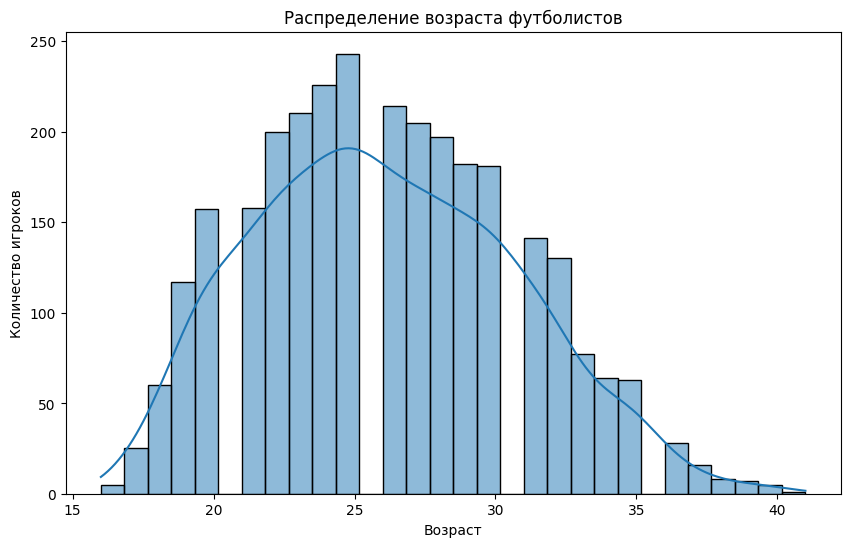

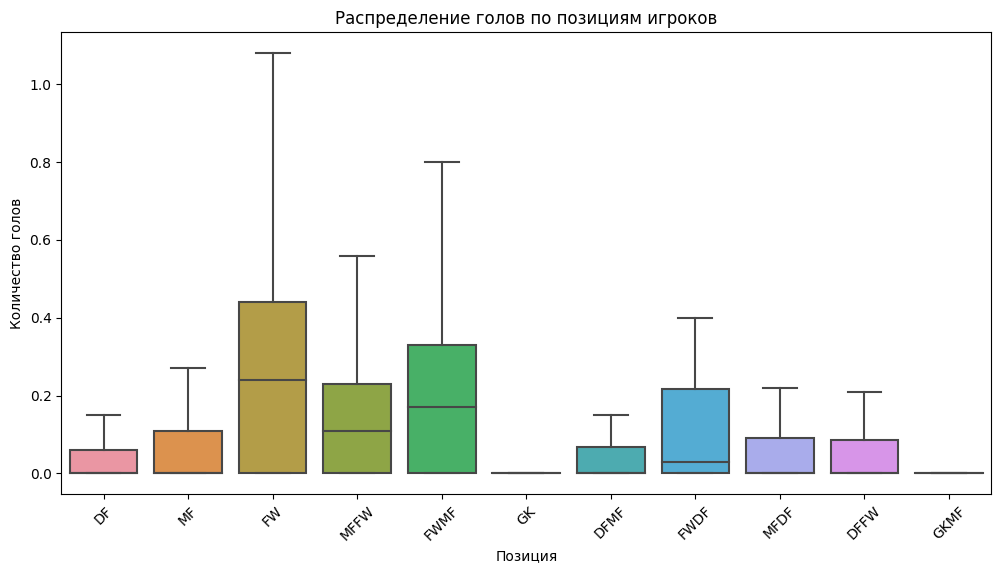

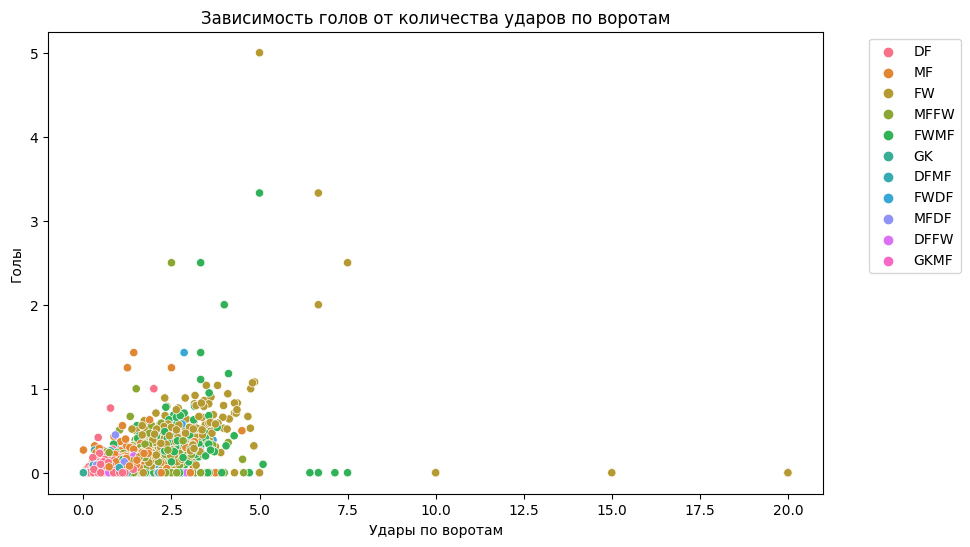

100%|███████████████████████████████████| 2921/2921 [00:00<00:00, 26271.23it/s]


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Попробуем разные кодировки, если utf-8 не работает
try:
    df = pd.read_csv('2021-2022 Football Player Stats.csv', sep=';', encoding='utf-8')
except UnicodeDecodeError:
    try:
        # Попробуем кодировку Windows-1252 (common for European text)
        df = pd.read_csv('2021-2022 Football Player Stats.csv', sep=';', encoding='windows-1252')
    except UnicodeDecodeError:
        # Попробуем latin-1 (ISO-8859-1), которая читает любой байт
        df = pd.read_csv('2021-2022 Football Player Stats.csv', sep=';', encoding='latin-1')

# Проверим, что данные загрузились
df.head()
df.info()
df.describe()
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Распределение возраста футболистов')
plt.xlabel('Возраст')
plt.ylabel('Количество игроков')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Pos', y='Goals', showfliers=False)
plt.title('Распределение голов по позициям игроков')
plt.xlabel('Позиция')
plt.ylabel('Количество голов')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Shots', y='Goals', hue='Pos')
plt.title('Зависимость голов от количества ударов по воротам')
plt.xlabel('Удары по воротам')
plt.ylabel('Голы')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

from tqdm import tqdm

# Пример использования tqdm для обработки данных
for index, row in tqdm(df.iterrows(), total=len(df)):
    # Здесь может быть ваша обработка данных
    pass

# Сохранение обработанных данных
df.to_csv('processed_football_stats.csv', index=False)
